Необходимые импорты и настройки

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pylab import rcParams


sns.set() #default default seaborn theme, scaling, and color palette
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'

np.random.seed(42) #By default - current system time. If you use the same seed value twice you will get the same random number twice. See example below

Основные непрерывные функции распределения (rv(s) - random value(s))

In [ ]:
norm_rv = stats.norm(loc=0, scale=5) #loc - mean, scale - stdev
tri_rv = stats.triang(c=0.5, loc=0, scale=5) # triangular dstbn represented with an up-sloping line from loc to (loc + c*scale) and then downsloping for (loc + c*scale) to (loc + scale).
gamma_rv = stats.gamma(a = 20, loc = 0, scale=5)

Генерация случайных чисел в соответствии с функцией распределения

In [ ]:
samples = norm_rv.rvs(5) # для 5 значений
#короче:
samples = stats.norm(loc=0, scale=5).rvs(5) # для 5 значений
samples.mean(), samples.std() 

(3.9625112333934944, 4.425460069837288)

Графики функций распределений (гистограммы)

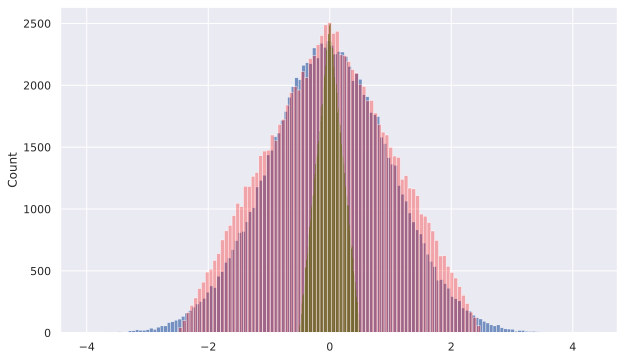

In [ ]:
n = 100000
sns.histplot(x=stats.norm(loc=0, scale=1).rvs(n), discrete=False);
sns.histplot(x=stats.triang(c=0.5, loc = -0.5).rvs(n), discrete=False, color = 'green', alpha = 0.9); # c - симметрия (0.5 - симметричное распределение)
sns.histplot(x=stats.triang(c=0.5, loc = -2.5, scale=5).rvs(n), discrete=False, color = 'red', alpha = 0.3); # c - симметрия (0.5 - симметричное распределение)

Теоретические функции распределения

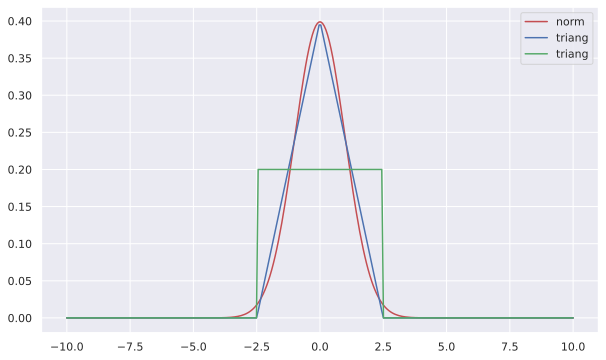

In [ ]:
x = np.linspace(-10, 10, 300) #Return evenly spaced numbers over a specified interval (start, stop, num)
sns.lineplot(x = x, y = stats.norm(loc=0, scale=1).pdf(x), color='r', label='norm');
sns.lineplot(x = x, y = stats.triang(c=0.5, loc=-2.5, scale=5).pdf(x), color='b', label='triang');
sns.lineplot(x = x, y = stats.uniform(loc=-2.5, scale=5).pdf(x), color='g', label='triang');

**Cмысл центральной предельной теоремы: распределение суммы случайных переменных стремится к нормальному распределению при увеличении количества слагаемых в этой сумме:**

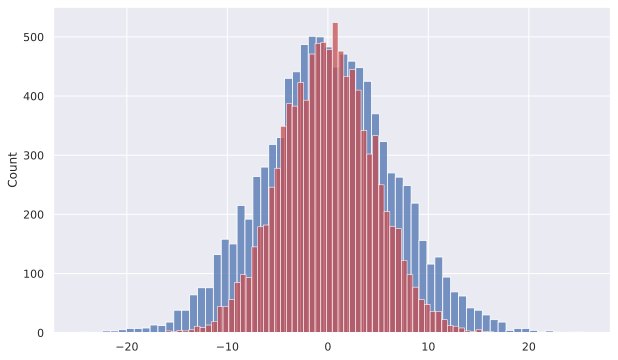

In [ ]:
unif_rv = stats.uniform(loc=-2.5, scale=5)
tri_rv = stats.triang(c=0.5, loc=-2.5, scale=5)

Y_samples_uni = [unif_rv.rvs(size=20).sum() for i in range(10000)]
Y_samples_tri = [tri_rv.rvs(size=20).sum() for i in range(10000)]
sns.histplot(x=Y_samples_uni);
sns.histplot(x=Y_samples_tri, color='r');

Poisson distrubution visualization.

NB! Probability mass functions (pmf) - used to describe discrete PD. 
probability density functions (pdf) - continuous PD

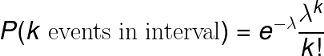

- Lambda (mu) - expected number of events in the intervalI like to write out,NB! rate parameter is a function of both the average events per time and the length of the time period.

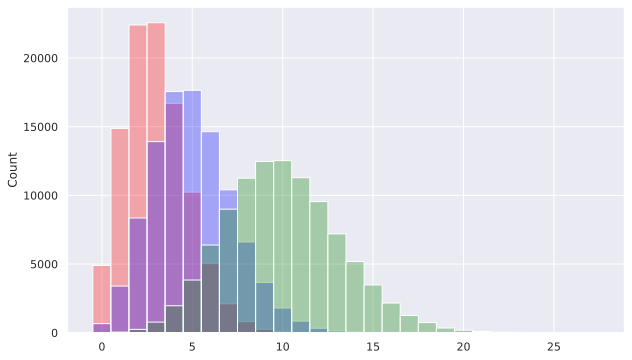

In [ ]:
from scipy.stats import poisson
poisson.rvs(mu=1, size=10)

#df=pd.DataFrame(poisson.rvs(mu=1, size=1000), columns = {'num'})
#df['num'].hist(bins=10, range = (1, 10) )

sns.histplot(x=poisson.rvs(mu=3, size=100000), discrete=True, color = 'red', alpha = 0.3);
sns.histplot(x=poisson.rvs(mu=5, size=100000), discrete=True, color = 'blue', alpha = 0.3);
sns.histplot(x=poisson.rvs(mu=10, size=100000), discrete=True, color = 'green', alpha = 0.3);

Невозможно получить отрицательное число заходов в магазин, но при небольшом потоке посетителей есть шанс, что в определённую минуту придут пять посетителей или не придёт ни одного. В таком случае распределение Пуассона обрезано на нуле и имеет длинный «хвост» в положительную сторону. При увеличении числа посетителей шанс не получить ни одного захода в магазин уже почти не реализуется, поэтому распределение Пуассона становится симметричным и стремится к нормальному.

A store sells 3 apples per day on average. 
What is the probability that they will sell 5 apples on a given day?

In [ ]:
poisson.pmf(k=5, mu=3)

0.10081881344492458